# **<span style="color: #87CEEB;"> CS437/CS5317/EE414/EE513 Deep Learning Programming Assignment 3</span>**

# <span style="color: #9370DB;">**Submission Guidelines**</span>

- <span style="color: #9370DB;">Please rename the file to `<RollNumber>_PA3_3`.</span>
- <span style="color: #9370DB;">Please also submit a **.py** file of every Notebook. You can do this by exporting your **ipynb** to a Python script.</span>
- <span style="color: #9370DB;">Please submit a zipped folder of both your Jupyter Notebooks and Python script files.</span>
- <span style="color: #9370DB;">PLEASE RUN ALL CELLS 🙏🏻.</span>




### Name:
### Roll Number:

# Part 1: GANs with Latent space interpolation

In this part of the assignment, you'll implement a Generative Adversarial Network (GAN) to:
- Generate images resembling handwritten digits from the MNIST dataset.
- Explore latent space interpolation between two images by transioning from one digit to another.
- Generate a few images of your own and perform some mathematical operations with them in the latent space to see what sort of output you can come up with.

[All code blocks should already have been run and the outputs should be visible in order to be graded]

### Imports

In [ ]:
# ============ Import stuff here =============
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
# ===== you may include more helper libs ======
# ===== (just don't include an entire =========
# ===== generator/discriminator - that ========
# ===== you've to make from scratch) ==========

### Load the MNIST thing

In this section:
- Load the MNIST dataset
- Transform/pre-process the dataset (if required)
- Define your test-train split
- Use dataloader to load stuff
- Print the split ratio AND visualize some of the digits (along with the labels)

In [3]:
# Code here

## Make your GANg
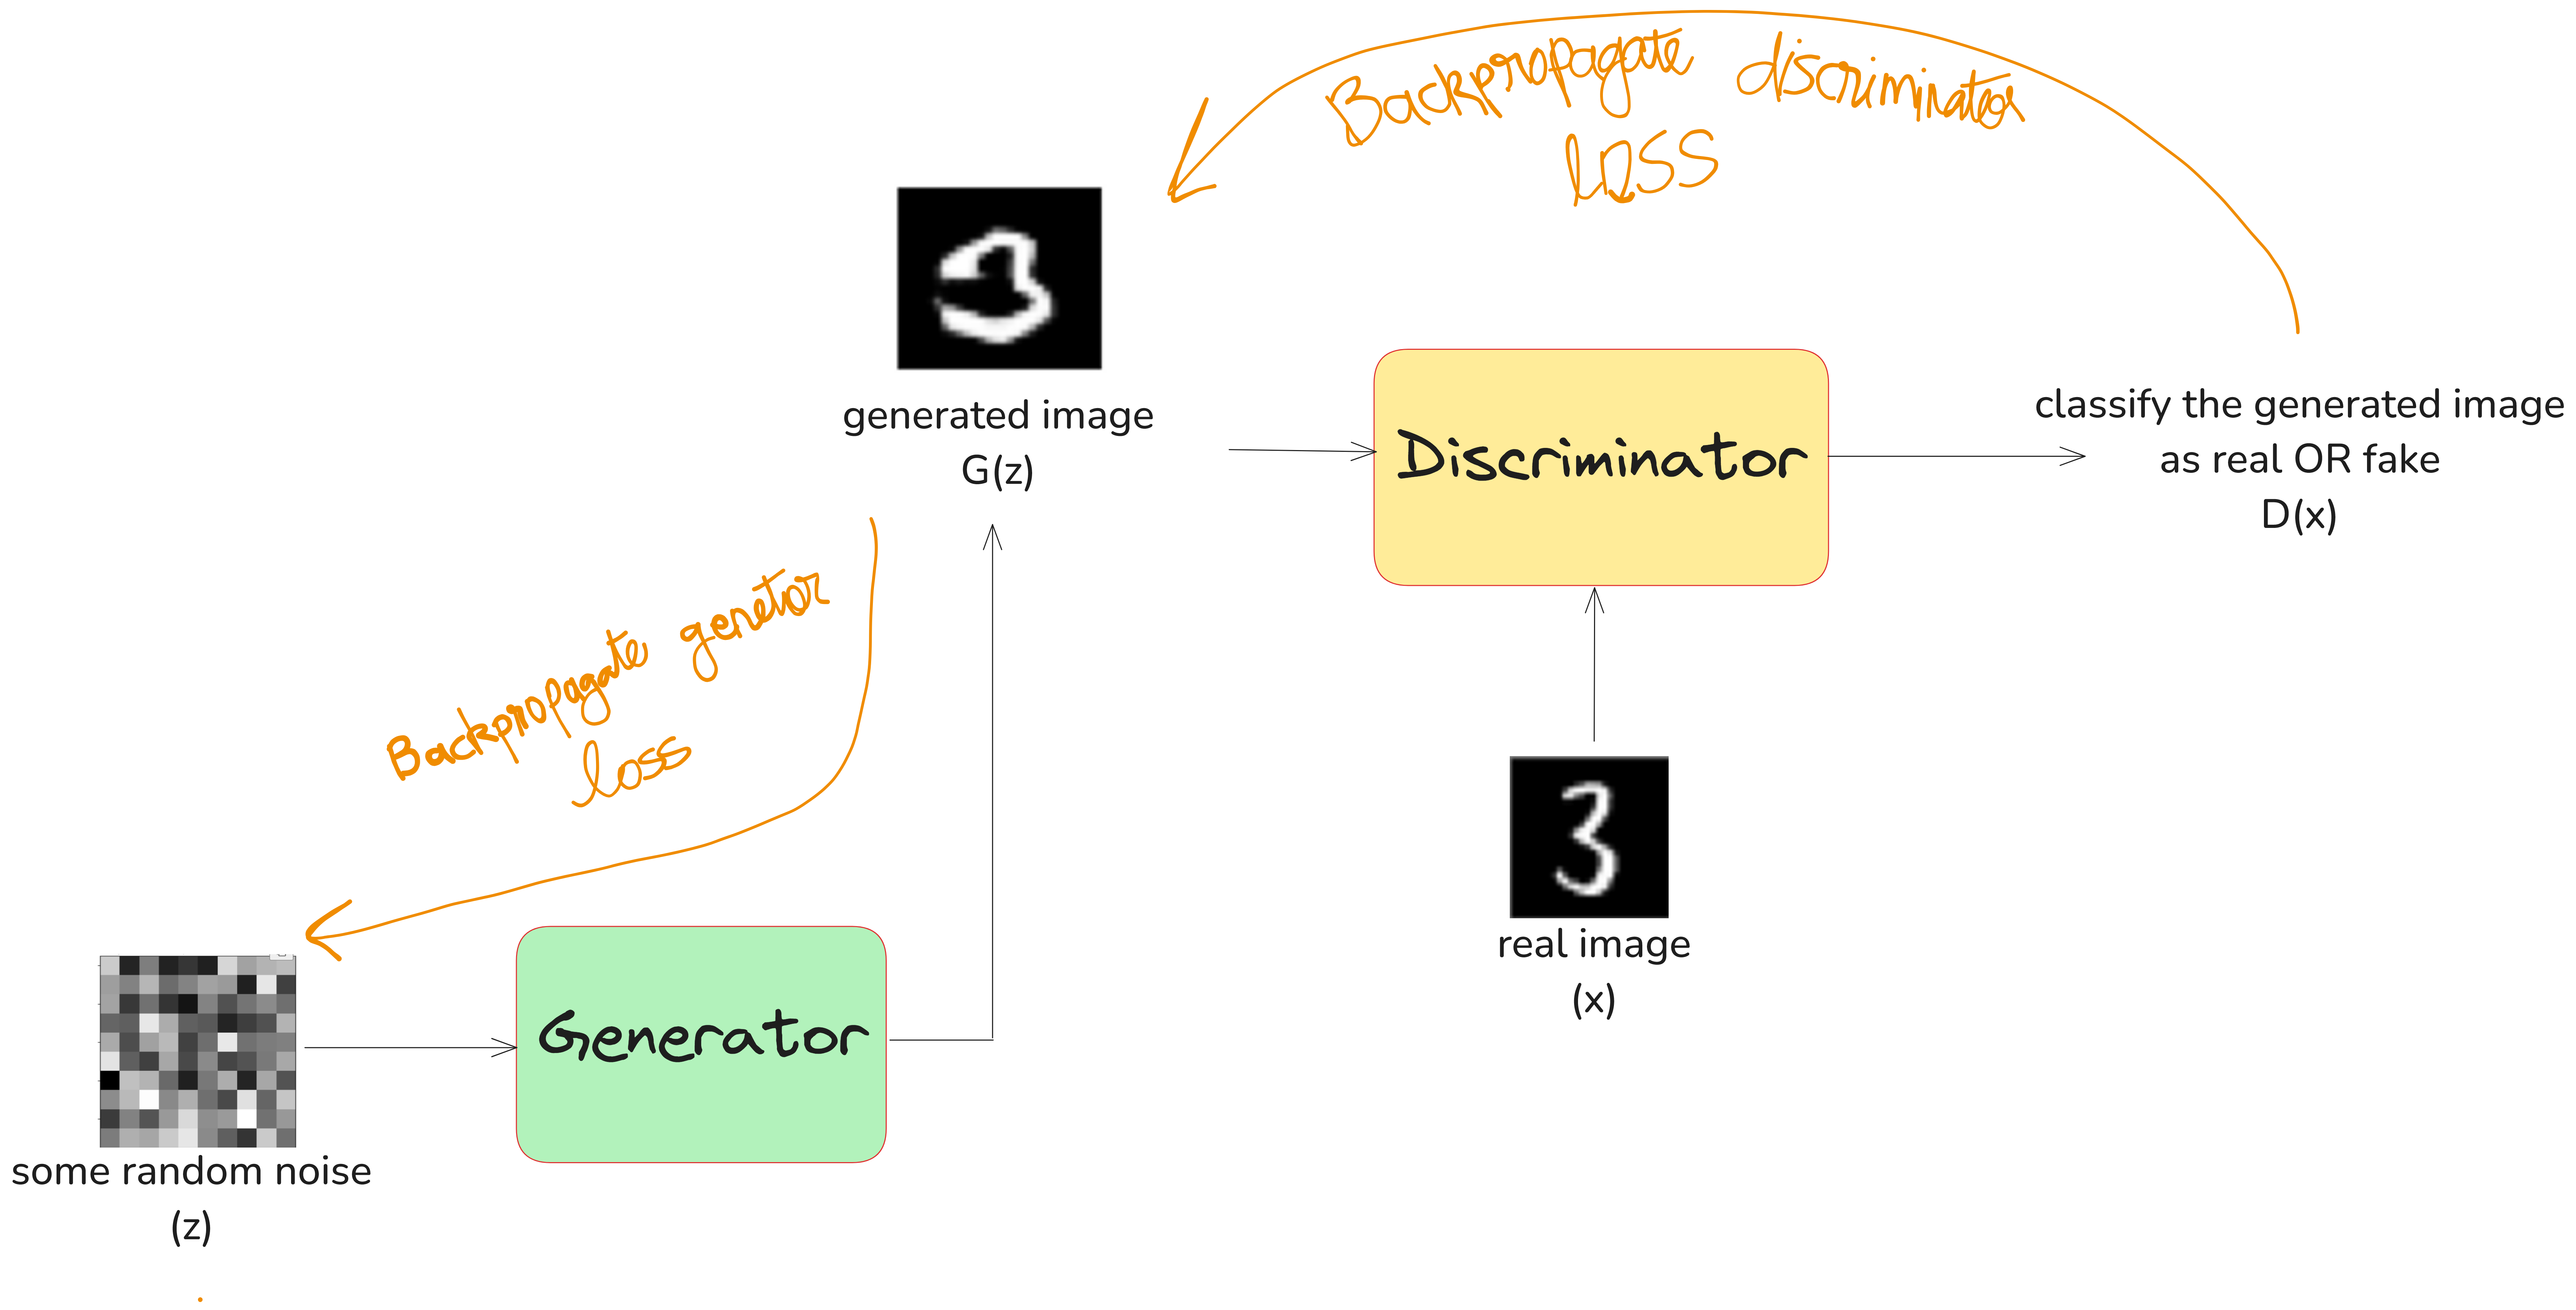

Basic GAN structure is show above. GANs have two componenets:

**Generator (G):** Takes a random noise vector ($z$) as input and generates synthetic image $G(z)$ i.e., an output that aims to resemble real data.
**Discriminator (D):** Acts as a binary classifier that distinguishes between real and fake image. It is trained to correctly identify whether an input is real (from the dataset) or fake (generated by G).

They both compete with each other. The generator tries to fool the discriminator, while the discriminator tries to improve its ability to detect fakes. This adversarial process helps the generator produce increasingly realistic outputs.

In [ ]:
# Code the Generator here
class Generator(nn.Module):
    def __init__(self):
        None
        
    def forward(self, x):
        return self.model(x)

In [ ]:
# Code the Discriminator here
class Discriminator(nn.Module):
    def __init__(self):
        None

    def forward(self, x):
        return self.model(x)

In [ ]:
# initializing the instances of the Generator and Discriminator respectively
generator = Generator()
discriminator = Discriminator()

### Losses and optimizers

In [ ]:
# Loss 
criterion = nn.BCELoss()

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

## Training Loop
Now we have to load the data (preprocess it or do some image augmentation if you need) and train the model. 

Lets have brief look at how the loop for a vanilla GAN looks like, and then you can implement it yourself.

Each epoch involves a couple of steps:
1. Prep some data both fake and real
2. Train the discriminator with some real data (real loss)
3. Train the discriminator with some fake data (fake loss)
4. Train the generator (generator loss)

details about losses is below

**Discriminator** 
The discriminator is trained to distinguish between real and fake images (binary classification). It aims to correctly classify real images as real and generated images as fake. It has two components:
- Real Loss: Measures how well the discriminator classifies real images correctly.
- Fake Loss: Measures how well the discriminator identifies fake images. <br> <br>
The total discriminator loss is given by: <br>
$ L_{D} =$ real loss $+$ fake loss <br>
where <br>
real loss $= E_{x}\log(D(x))$ <br>
fake loss $= E_{z}\log(1-D(G(z)))$


**Generator** 
The generator tries to fool the discriminator by generating images that D misclassifies as real. Instead of minimizing the difference between generated and real images directly, G is trained to maximize the likelihood that $D$ assigns high probability to fake images (so it'll only have the maximizing portion) <br><br>
$ L_{G} = E\log(D(G(z)))$  <br>

In [ ]:
epochs = 0

# Training Loop

### Display stats
1. Save the best generator and discrinimator (as `rollnumber_gen.pth` and `rollnumber_disc.pth` respectively).
2. Plot disc and gen losses.
3. Visualize the an image from the best generator.

In [ ]:
# code

### Latent space interpolation with MNIST
The latent space is the space of all possible inputs that the generator can take, and it is a vector space, and since it is a vector space we can do some vector operations on it, such as interpolation, which is what we will be doing here.
To read up more on this, you can visit the following link: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/


Things to do:
1. Define two random noises of some latent dimensions.
2. Generate images by interpolating from one noise to the other. You can use the following formula as a reference:  
   
   $$
   \text{interpolation} = \alpha \cdot z_1 + (1-\alpha) \cdot z_2
   $$  

   where  $z_{1}$ and $z_{2}$ are two random noises in the latent space. the result here should be a series of images that show how the generator is transitioning from one image to another; such as, how it goes from an image of 3 to an image of 7 for example.

3. Visualize/plot the interpolated generation.

(please make sure that there are atleast 10 steps, including the final and starting images and you visualize all 10 steps)


In [ ]:
# code here

### Latent space interpolation with pre-trained CelebA
`CelebA` dataset contains ~200,000 images of 178×218 consisting of celebrity faces. Luckily, you don't have to train your GAN over this cuz we're providing you with the pretrained model (and template code to load it). You can download the pre-trained generator from [here](https://pern-my.sharepoint.com/:f:/g/personal/24100238_lums_edu_pk/Eumg8ej04zBJigkuymRYz9MBFRscbETu-NzdzA6tsvYQPQ?e=50uaWN). There's also a `dcgan.py` file (that you're supposed to put in the current directory). 

In this section, you're supposed to perform latent space interpolation just like you did with MNIST. Your  output should look smth like this:
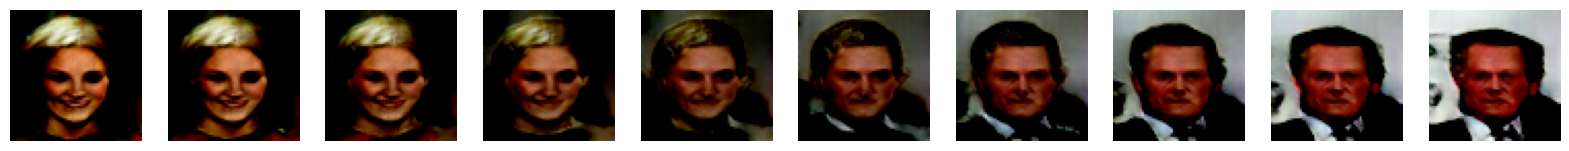
(a smiling woman interpolated to a neutral man)

In [ ]:
# put the dcgan.py file and generator.pt in the current directory and then run this cell
from dcgan import DCGAN
generator_path = "generator.pt"
gan = DCGAN(gan_type="gan", use_cuda=True)
gan.load_model(filename=generator_path, use_cuda=torch.cuda.is_available())
gan.eval()
gan = gan.to(device)
print("Number of parameters in the pre-trained generator:", gan.get_num_params())
# gan = gan.cuda()  # Move to GPU if available

In [ ]:
'''
TODO: 
1- Visualize the images generated from z1 and z2
2- Interpolate from z1 to z2 (using the formula given above) and 
   plot all interpolation (just like the given example). This task
   is more or less similar to the one you did with MNIST.
3- Make sure interpolation has minimum of 10 steps.
'''

# ====== Your code below ========

# ====== Your code above ========


### Vector arithmatic in the latent space
Since issa vector space, you can perform arithmatics (such as subtraciton, addition etc.)
<br>

When interpolating between two celebA images in the latent space, you might notice that the transition sometimes passes through representations of other facial expressions/genders. If you see the example above, while morphing from a smiling woman to a neutral man, the image briefly resembles a neutral woman. This happens because the latent space captures underlying features of the dataset, and the interpolation path can traverse regions where features of both numbers mix.

This concept extends to arithmetic in the latent space—adding/subtracting two (or more) latent vectors can produce meaningful blends of their features. For instance, adding the representation of a black person and a white person might generate a brown person.

Now, in this section, you're supposed to perform the following tasks:
1. Generate two (or more) images.
2. Perform some arithmetic on their latent space vectors and then generate the image from the resultant.
3. Display the results. <br>

### Example:
1.  $\text{random\_noise}_1$  generates $\text{generated\_image}_1$, and  
   $\text{random\_noise}_2$ generates $\text{generated\_image}_2$. 
   You can save your noises as `.pt` file using `torch.save()`.
2. Compute the new latent vector:  
   $\text{random\_noise}_r$ = $\text{random\_noise}_1$ + $\text{random\_noise}_2$
3. Generate an image from $\text{random\_noise}_r$, denoted as $\text{generated\_image}_r$.
4. Display the results and check if:  
   $\text{generated\_image}_r$ = $\text{generated\_image}_1$ + $\text{generated\_image}_2$

Repeat this for at least three different pairs of images (with diff arithmetics).

Note: the arithematic results won't be perfect but to some extent would make sense. 

In [ ]:
# display random images from the generator, then dispaly there arithmetic.

In [ ]:
# display random images from the generator, then dispaly there arithmetic.

In [ ]:
# display random images from the generator, then dispaly there arithmetic.

## ANALYTICAL QUESTIONS

**Q1:** You see some of the generated images are distorted or sorta unrealistic. What major problem do you think GANs have that's causing this distortion? <br><br>
**Ans** (keep it very brief and preferably make bullet points):

You may have look over [here](https://aurorasolar.com/blog/putting-ai-to-the-test-generative-adversarial-networks-vs-diffusion-models/) how diffusion models intriduced realism in the image generations (as compared to the GANs)